In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


# โจทย์

ให้สร้างโมเดลในการทำนายผลราคาบ้านโดยอาศัยข้อมูลจากชุดข้อมูลที่กำหนดให้
โดยทีตารางจะมีข้อมูลทั้งหมด 4 คอลลัมน์ นั่นคือ
* RM
* LSTAT
* PTRATIO
* MEDV  (นี่คือสิ่งที่ต้องทำนายผล)

โดยอาศัยอัลกอริทึ่มที่ให้ แล้วลองเทียบผลดูว่าตัวไหนมีความแม่นยำมากที่สุด

In [2]:
House_price_df = pd.read_csv(
    "C:/Users/thatt/Documents/Coding Project/PyBasic Learn/main/class/data/data.csv"
)

In [3]:
House_price_df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
House_price_df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [5]:
x_ax = House_price_df[["RM", "LSTAT", "PTRATIO"]]
y_ax = House_price_df["MEDV"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_ax, y_ax, random_state=123)

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
}

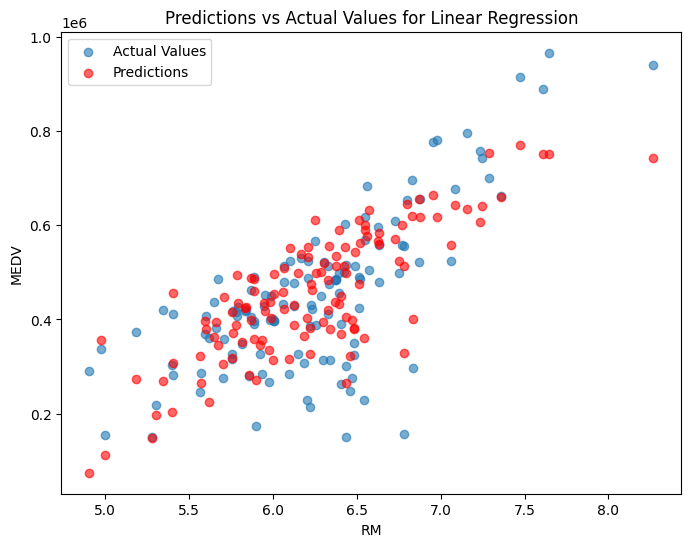

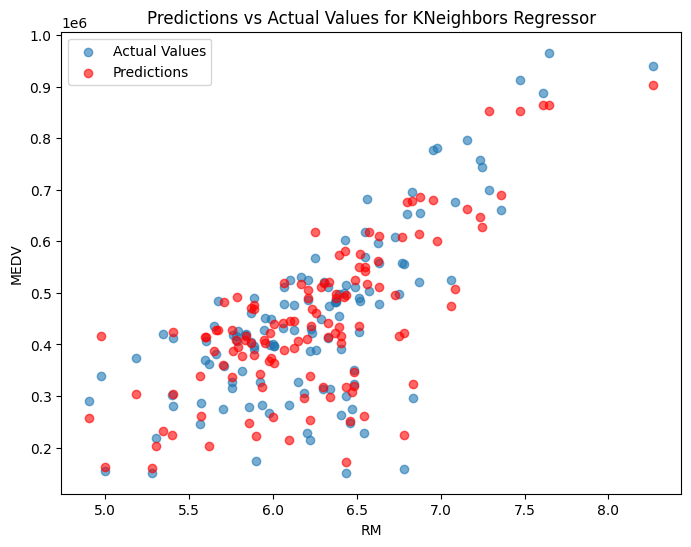

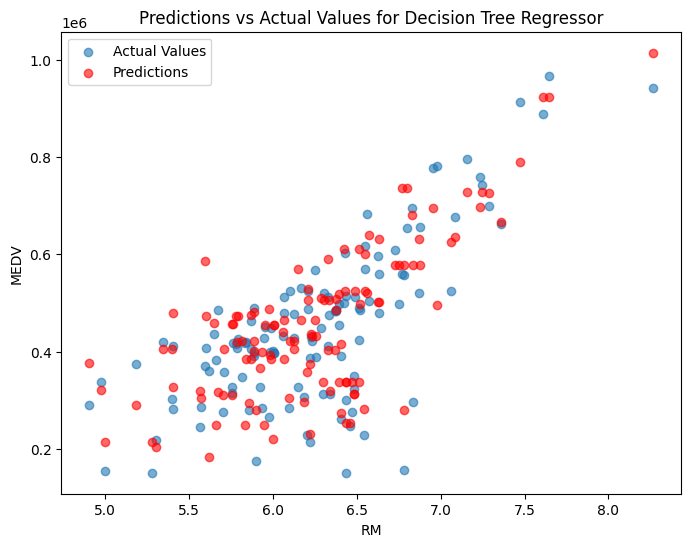

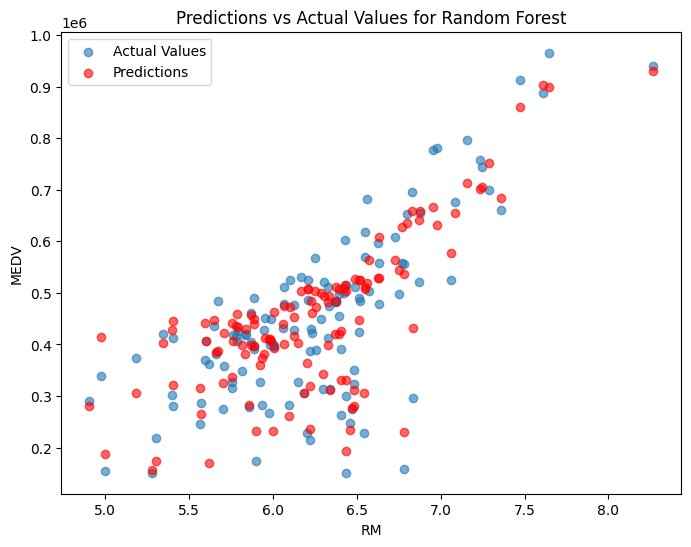

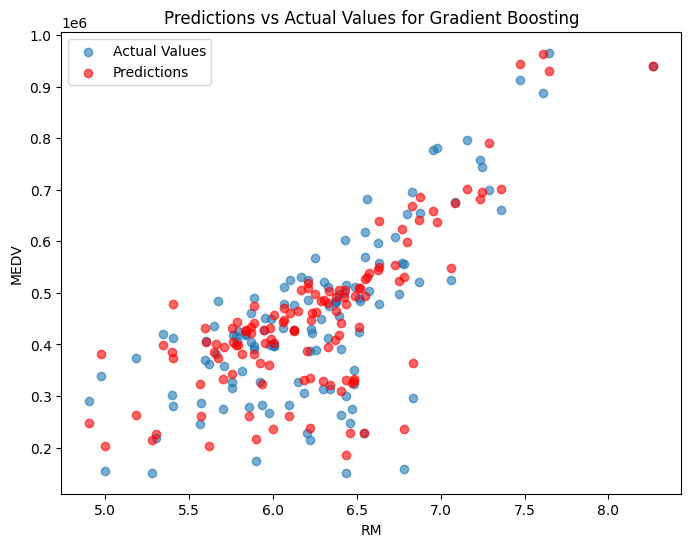

In [8]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test["RM"], y_test, label="Actual Values", alpha=0.6)
    plt.scatter(X_test["RM"], predictions, color="r", label="Predictions", alpha=0.6)
    plt.xlabel("RM")
    plt.ylabel("MEDV")
    plt.title(f"Predictions vs Actual Values for {name}")
    plt.legend()
    plt.show()

In [9]:
mse_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test, predictions))
    mse_results[name] = mse

Linear Regression MSE: 82660.07
KNeighbors Regressor MSE: 71389.76
Decision Tree Regressor MSE: 89371.69
Random Forest MSE: 62778.35
Gradient Boosting MSE: 61703.16


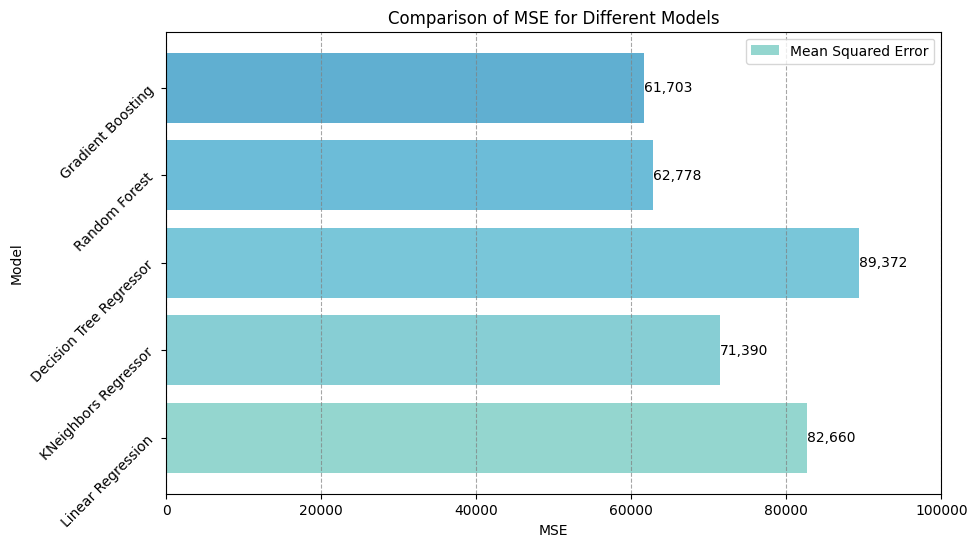

In [13]:
for name, mse in mse_results.items():
    print(f"{name} MSE: {mse:.2f}")

plt.figure(figsize=(10, 6))
colors = plt.cm.GnBu(np.linspace(0.5, 0.7, len(mse_results)))
ax_plt = plt.barh(
    list(mse_results.keys()),
    list(mse_results.values()),
    color=colors,
    alpha=0.8,
)

plt.xlim(0, 100_000)
plt.xlabel("MSE")
plt.ylabel("Model")
plt.title("Comparison of MSE for Different Models")
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.legend(["Mean Squared Error"])

plt.grid(axis="x", linestyle="--", alpha=0.7, color="gray", linewidth=0.8)
plt.bar_label(ax_plt, fmt="{:,.0f}")
plt.show()